In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/CPE495/aqiindoor.csv"
df = pd.read_csv(path)
df.head()

,Date_Time,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO,NH3,Temperature,Humidity,eCO2,TVOC,Thai_AQI,AQI_Level
0,2025-04-26T02:38:17.9130000,7,7,1.819415,46.850742,5.382890,5.234305,17.368391,29.799999,42.400002,844,67,35,Good
1,2025-04-25T23:50:39.1900000,5,6,2.244415,46.850742,6.717556,6.502351,23.182974,35.700001,36.299999,1032,96,51,Moderate
2,2025-04-26T02:40:46.4470000,5,6,1.990208,46.850742,5.494240,5.315798,17.685310,30.000000,40.700001,1310,138,36,Good
3,2025-04-26T02:21:16.8170000,6,8,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37,Good
4,2025-04-26T02:21:16.8170000,6,8,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37,Good


In [ ]:
df.columns

Index(['Date_Time', 'AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_SO2', 'AQI_NO2',
       'AQI_CO', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC', 'Thai_AQI',
       'AQI_Level', 'air_quality_cluster'],
      dtype='object')

## Data Preparation

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Date_Time,0
AQI_PM2.5,0
AQI_PM10,0
AQI_O3,0
AQI_SO2,0
AQI_NO2,0
AQI_CO,0
NH3,0
Temperature,0
Humidity,0


In [ ]:
# เช็ดว่าเป็น Dtype อะไรบ้าง
df.dtypes

,0
Date_Time,object
AQI_PM2.5,int64
AQI_PM10,int64
AQI_O3,float64
AQI_SO2,float64
AQI_NO2,float64
AQI_CO,float64
NH3,float64
Temperature,float64
Humidity,float64


In [ ]:
df

,Date_Time,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO,NH3,Temperature,Humidity,eCO2,TVOC,Thai_AQI,AQI_Level
0,2025-04-26T02:38:17.9130000,7,7,1.819415,46.850742,5.382890,5.234305,17.368391,29.799999,42.400002,844,67,35,Good
1,2025-04-25T23:50:39.1900000,5,6,2.244415,46.850742,6.717556,6.502351,23.182974,35.700001,36.299999,1032,96,51,Moderate
2,2025-04-26T02:40:46.4470000,5,6,1.990208,46.850742,5.494240,5.315798,17.685310,30.000000,40.700001,1310,138,36,Good
3,2025-04-26T02:21:16.8170000,6,8,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37,Good
4,2025-04-26T02:21:16.8170000,6,8,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2025-04-27T05:34:29.5470000,10,10,2.071920,46.850742,3.173625,2.860352,9.245551,29.400000,39.599998,413,1,16,Good
49996,2025-04-27T05:35:13.9830000,11,13,2.225336,46.850742,3.287158,2.869385,9.075038,29.500000,39.299999,452,7,16,Good
49997,2025-04-27T05:16:50.7170000,7,7,2.335414,46.850742,3.212611,2.896611,9.276814,29.799999,39.700001,2172,1080,16,Good
49998,2025-04-27T05:18:05.7030000,7,8,2.570456,46.850742,3.238786,2.869385,9.339576,29.900000,41.599998,2203,1151,16,Good


## Data Visualization

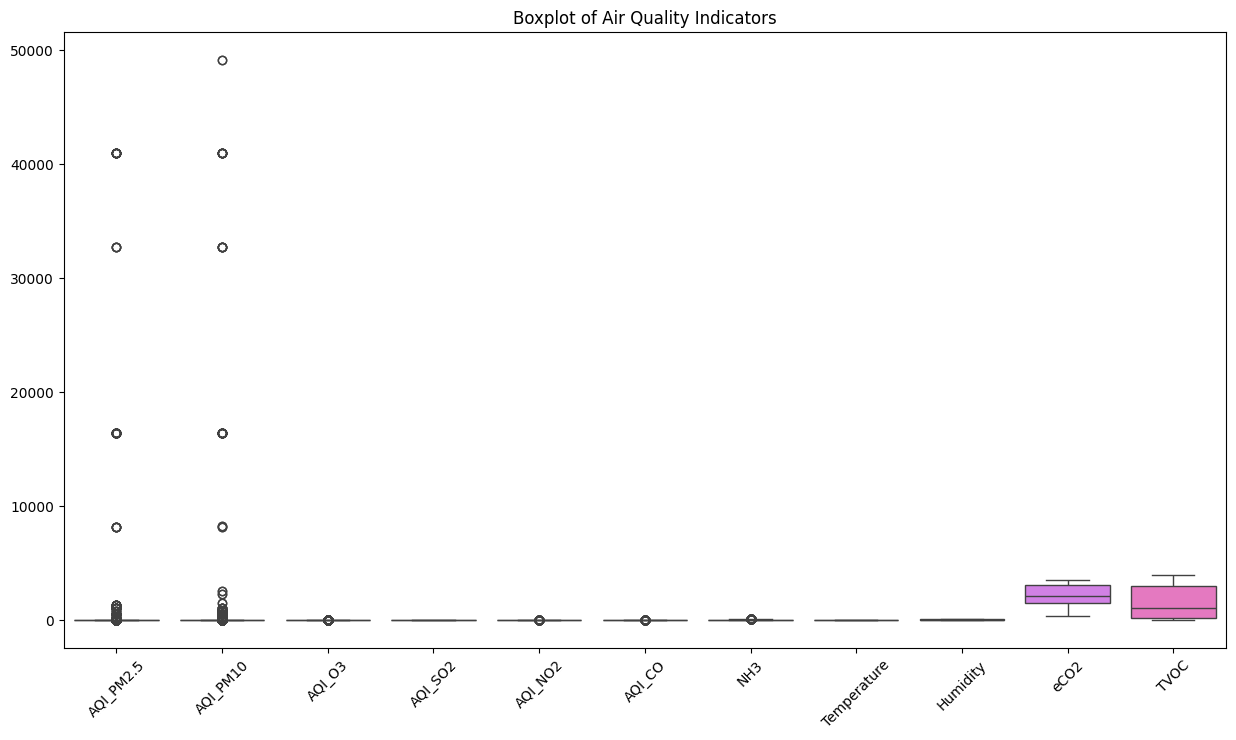

In [ ]:
# ทำกราฟ boxplot AQI_PM2.5	AQI_PM10	AQI_O3	AQI_SO2	AQI_NO2	AQI_CO	NH3	Temperature	Humidity	eCO2	TVOC

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC']])
plt.xticks(rotation=45)
plt.title('Boxplot of Air Quality Indicators')
plt.show()


In [ ]:
def replace_outliers_with_quartiles(df):

    for column in df.select_dtypes(include=['number']).columns:

        # Used to cycle through all numeric columns in the DataFrame.

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # To identify outliers, lower and upper limits are calculated and values ​​
        # outside these limits are considered outliers.

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # For each column, we identify outliers and replace them with Q1 or Q3.
        # We do this using a lambda function. If the value is less than the lower bound,
        #it is replaced with Q1. If it is greater than the upper bound,
        #it is replaced with Q3.
        #In the last case, the value is not changed and remains the same.

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

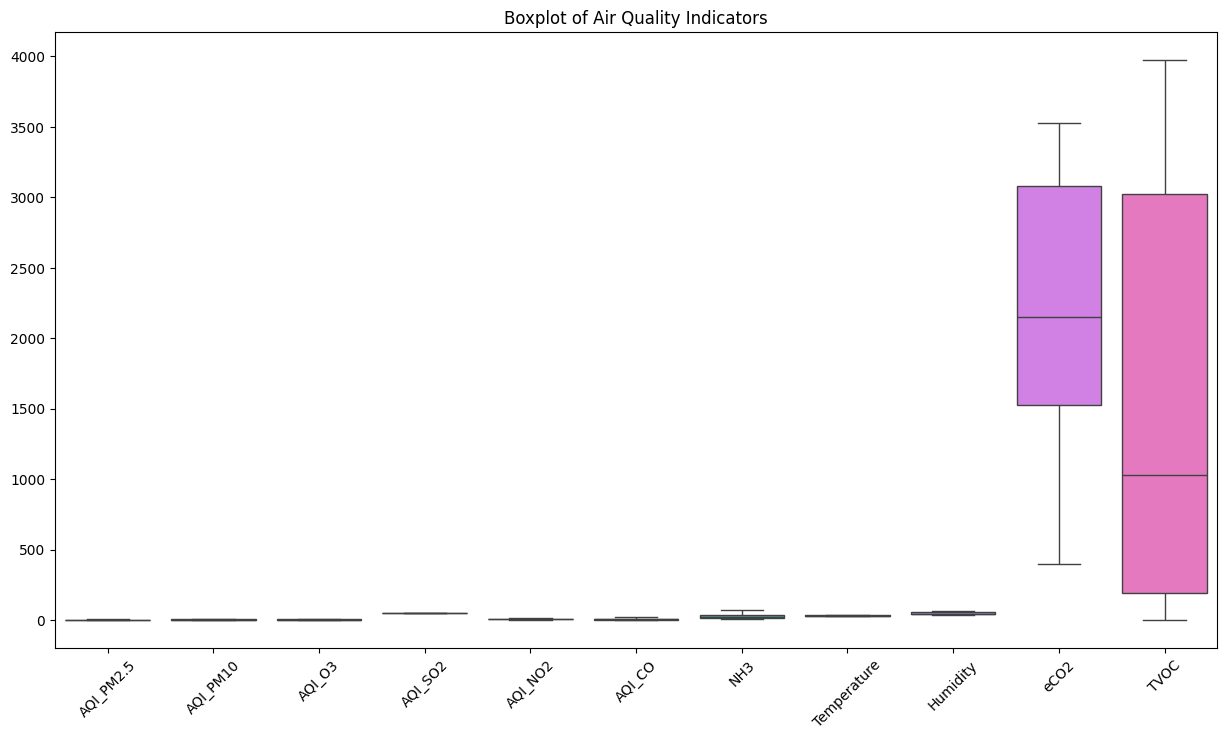

In [ ]:
# ทำกราฟ boxplot AQI_PM2.5	AQI_PM10	AQI_O3	AQI_SO2	AQI_NO2	AQI_CO	NH3	Temperature	Humidity	eCO2	TVOC

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC']])
plt.xticks(rotation=45)
plt.title('Boxplot of Air Quality Indicators')
plt.show()

## Feature Engineering

In [ ]:
# ทำ AQI bucketing แต่เป็น ของ aqi thai โดยรับ Thai_AQI	0-25 คือ คุณภาพอากาศดีมาก 26-37 คุณภาพอากาศดี 38-50 ปานกลาง 51-90 เริ่มมีผลกระทบ 91 มีผลกระทบ

def categorize_thai_aqi(Thai_AQI):
  """Categorizes Thai AQI values into different quality levels.

  Args:
    aqi: The Thai AQI value.

  Returns:
    A string representing the AQI category.
  """
  if 0 <= Thai_AQI <= 25:
    return "ดีมาก"
  elif 26 <= Thai_AQI <= 37:
    return "ดี"
  elif 38 <= Thai_AQI <= 50:
    return "ปานกลาง"
  elif 51 <= Thai_AQI <= 90:
    return "เริ่มมีผลกระทบ"
  elif Thai_AQI >= 91:
    return "มีผลกระทบ"
  else:
    return "ไม่ระบุ"  # Handle cases where AQI is negative or invalid

# Assuming 'Thai_AQI' is the column name in your dataframe
df['AQI_Level'] = df['Thai_AQI'].apply(categorize_thai_aqi)

In [ ]:
df

,Date_Time,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO,NH3,Temperature,Humidity,eCO2,TVOC,Thai_AQI,AQI_Level,air_quality_target
0,2025-04-26T02:38:17.9130000,7.0,7.0,1.819415,46.850742,5.382890,5.234305,17.368391,29.799999,42.400002,844,67,35.0,Good,Good
1,2025-04-25T23:50:39.1900000,5.0,6.0,2.244415,46.850742,6.717556,6.502351,23.182974,35.700001,36.299999,1032,96,51.0,Moderate,Bad
2,2025-04-26T02:40:46.4470000,5.0,6.0,1.990208,46.850742,5.494240,5.315798,17.685310,30.000000,40.700001,1310,138,36.0,Good,Bad
3,2025-04-26T02:21:16.8170000,6.0,8.0,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37.0,Good,Bad
4,2025-04-26T02:21:16.8170000,6.0,8.0,2.584928,46.850742,5.344057,5.436341,18.279758,30.299999,43.599998,1060,100,37.0,Good,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2025-04-27T05:34:29.5470000,10.0,10.0,2.071920,46.850742,3.173625,2.860352,9.245551,29.400000,39.599998,413,1,16.0,Good,Good
49996,2025-04-27T05:35:13.9830000,4.0,5.0,2.225336,46.850742,3.287158,2.869385,9.075038,29.500000,39.299999,452,7,16.0,Good,Good
49997,2025-04-27T05:16:50.7170000,7.0,7.0,2.335414,46.850742,3.212611,2.896611,9.276814,29.799999,39.700001,2172,1080,16.0,Good,Bad
49998,2025-04-27T05:18:05.7030000,7.0,8.0,2.570456,46.850742,3.238786,2.869385,9.339576,29.900000,41.599998,2203,1151,16.0,Good,Bad


In [ ]:
# prompt: AQI_Level ทำการ label encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'AQI_Bucket' column
df['AQI_Level'] = label_encoder.fit_transform(df['AQI_Level'])

# Print the mapping between categories and encoded values
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'ดี': np.int64(0), 'ดีมาก': np.int64(1), 'ปานกลาง': np.int64(2), 'มีผลกระทบ': np.int64(3), 'เริ่มมีผลกระทบ': np.int64(4)}


In [ ]:
df.columns

Index(['Date_Time', 'AQI_PM2.5', 'AQI_PM10', 'AQI_O3', 'AQI_SO2', 'AQI_NO2',
       'AQI_CO', 'NH3', 'Temperature', 'Humidity', 'eCO2', 'TVOC', 'Thai_AQI',
       'AQI_Level'],
      dtype='object')

## Split

In [ ]:
enc_columns = ['AQI_PM2.5', 'AQI_PM10' , 'AQI_O3' , 'AQI_SO2', 'AQI_NO2' , 'AQI_CO']
X = df[enc_columns]
X.head()

,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO
0,7,7,1.819415,46.850742,5.382890,5.234305
1,5,6,2.244415,46.850742,6.717556,6.502351
2,5,6,1.990208,46.850742,5.494240,5.315798
3,6,8,2.584928,46.850742,5.344057,5.436341
4,6,8,2.584928,46.850742,5.344057,5.436341


In [ ]:
y = df['AQI_Level']
y

,AQI_Level
0,0
1,4
2,0
3,0
4,0
...,...
49995,1
49996,1
49997,1
49998,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
X_train.shape , X_test.shape

((35000, 6), (15000, 6))

In [ ]:
y_train.shape , y_test.shape

((35000,), (15000,))

In [ ]:
X_train

,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO
39613,0,0,1.382027,46.850742,3.770343,3.420827
32382,1,1,1.340999,46.850742,7.217493,7.348090
708,7,7,1.961731,46.850742,5.363443,5.293463
29245,1,1,7.833921,46.850742,10.427330,11.350595
11513,3,4,2.826800,46.850742,10.589377,11.588923
...,...,...,...,...,...,...
23452,0,2,6.009783,46.850742,6.272439,6.351645
23775,1,2,7.410789,46.850742,7.608958,7.761779
37135,1,1,1.529822,46.850742,4.176335,3.775578
27098,0,1,7.959110,46.850742,10.183268,10.710867


In [ ]:
y_train

,AQI_Level
39613,1
32382,4
708,0
29245,3
11513,3
...,...
23452,2
23775,4
37135,1
27098,3


In [ ]:
X_test

,AQI_PM2.5,AQI_PM10,AQI_O3,AQI_SO2,AQI_NO2,AQI_CO
18991,1,2,4.150571,46.850742,8.455682,8.887298
41632,7,11,2.938981,46.850742,3.532064,3.140738
36306,0,0,1.130153,46.850742,4.547356,4.275485
26881,0,0,8.869030,46.850742,10.027942,10.874598
3469,6,7,2.388895,46.850742,5.421965,5.271209
...,...,...,...,...,...,...
21738,0,0,3.910099,46.850742,7.149968,6.946227
40264,1,3,2.007471,46.850742,3.736292,3.389928
4836,5,5,1.637482,46.850742,5.421965,5.300898
47533,8,9,2.077869,46.850742,3.322656,2.984095


In [ ]:
y_test

,AQI_Level
18991,3
41632,1
36306,1
26881,3
3469,0
...,...
21738,4
40264,1
4836,0
47533,1


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib  # สำหรับบันทึกโมเดล

# 📌 Standardization การปรับค่าให้ เฉลี่ย
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# 📌 ใช้ PCA ลดมิติ (ถ้าจำนวน feature เยอะ)
pca = PCA(n_components=5)  # ลดเหลือ 5 มิติ (ปรับตาม dataset)
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
# 📌 Train KNN ด้วย K ที่ดีที่สุด
knn = KNeighborsClassifier(n_neighbors=8, weights="distance")
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

✅ Accuracy: 0.9886666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2314
           1       1.00      1.00      1.00      4324
           2       0.96      0.95      0.96      1234
           3       0.99      0.99      0.99      5330
           4       0.97      0.96      0.97      1798

    accuracy                           0.99     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.99      0.99      0.99     15000



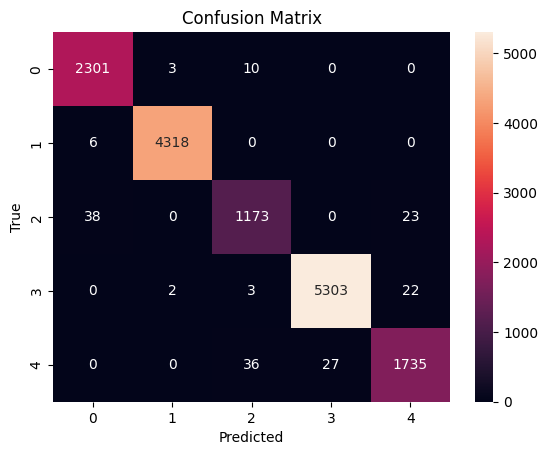

In [ ]:
# 📌 ทดสอบโมเดลกับข้อมูลทดสอบ
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)
y_pred = knn.predict(X_test_pca)

# 📌 วัดความแม่นยำ
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# เช็ด overfitting ด้วย cross-validation

# 📌 Use cross-validation to prevent overfitting
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

# Train the model on the entire training set using the best k (if needed)
knn.fit(X_train_pca, y_train)

# ... rest of your code for testing and evaluation


Cross-validation scores: [0.98871429 0.98814286 0.989      0.98971429 0.98814286]
Average cross-validation score: 0.9887428571428571


KNeighborsClassifier(n_neighbors=8, weights='distance')

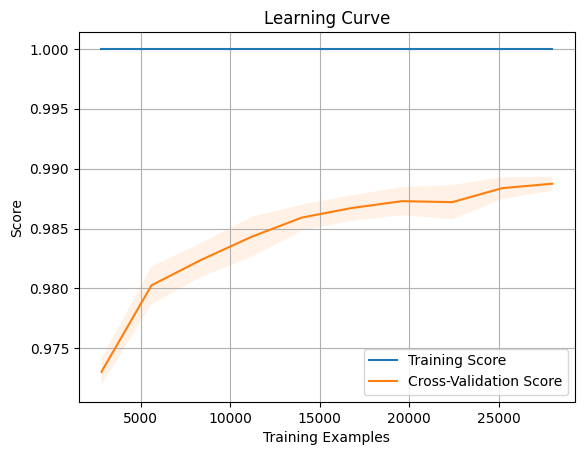

In [ ]:
# ดู learning curve

# Assuming you want to visualize the learning curve for the KNN model.
# You'll need to use the learning_curve function from sklearn.model_selection.

from sklearn.model_selection import learning_curve

# Define the range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10) # Adjust the number of points as needed

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,  # Your KNN classifier
    X=X_train_pca,  # Your training data after PCA
    y=y_train,      # Your target variable
    train_sizes=train_sizes,
    cv=5,           # Number of cross-validation folds (adjust as needed)
    scoring='accuracy',  # You can use other scoring metrics here
    n_jobs=-1        # Use all available CPU cores for faster computation
)

# Calculate the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
# prompt: dump pkl ของ model , pca , Standardization ใน folder CPE495

import joblib
import os

# Create the directory if it doesn't exist
directory = "/content/drive/MyDrive/CPE495"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the model, pca, and scaler
joblib.dump(knn, os.path.join(directory, 'knn_model.pkl'))
joblib.dump(pca, os.path.join(directory, 'pca.pkl'))
joblib.dump(scaler, os.path.join(directory, 'scaler.pkl'))


['/content/drive/MyDrive/CPE495/scaler.pkl']